# ArXiv Miner

Analysis to look at summary statistics of arxiv papers
Authors: Vanessa Sochat and Dor Ma'ayan, November 2018

## Comments

The analysis was run on the Sherlock cluster at Stanford, and the following modules loaded:

```bash
git clone https://www.github.com/penrose/arxiv-miner && cd arxiv-miner
module load python/3.6.1
module load py-pandas/0.23.0_py36
module load py-ipython/6.1.0_py36
```

The scripts used were `run_clusterAnalsis.py` and `clusterAnalysis.py` We have a total of 48 papers that are missing the number of pages metadata, and need to create an inventory from the original source of the data, as @vsoch thinks she is missing some (only 418,808 are included in this analysis).

## Data Description

Each journal (month and year or older version, topic) are grouped together in a pickle file. Within the pickle file we have a data frame that has the following for each row:

```bash

uid                                               quant-ph/0312047
topic                                                     quant-ph
month                                                           12
year                                                            03
tags                                                      quant-ph
inputFile        /scratch/users/vsochat/WORK/arxiv/data/quant-p...
numberPages                                                      8
numberLines                                                    706
numberChars                                                  38228
numberFiles                                                      1
numberFigures                                                    8
```


In [1]:
## Helper Functions
import json
def pretty_print(obj):
    print(json.dumps(obj, indent=4, sort_keys=True))

In [2]:
import os
import sys
import re
import pandas
import pickle
import matplotlib

matplotlib.use('agg')
%matplotlib inline

# Here is the input data that contains three equivalent dictionaries, organized differently
results = pickle.load(open('arxiv-count-results.pkl','rb'))
print('\n'.join(list(results.keys())))

global
topic
dates


In [3]:
#"global" refers to a summary count, etc., across all timepoints!
# It's not incredibly useful

results['global']

{'chars': 29118275853,
 'figure_papers': 280783,
 'figures': 1771261,
 'figures_per_page': 0.23889716715913684,
 'files': 591453,
 'lines': 534289028,
 'pages': 7414324,
 'papers': 418714}

In [4]:
# Each of topics and dates shows the same data organized by topic, and by date (month and year) respectively
# For example, here is the "quant-ph" summary. We can, at a glance, see that (on average) the number of figures is
# more than the baseline across all papers.
results['topic']['quant-ph']

{'chars': 1094869678,
 'figure_papers': 14578,
 'figures': 72801,
 'figures_per_page': 0.2960930890870046,
 'files': 22272,
 'lines': 18071291,
 'pages': 245872,
 'papers': 18878}

In [5]:
# As another example, we can look at a particular timepoint (across all topics)
# here is January 2000, and December 1999
import json
pretty_print(results['dates']['0001'])
pretty_print(results['dates']['9912'])

{
    "chars": 11780829,
    "figure_papers": 139,
    "figures": 884,
    "figures_per_page": 0.23038832421162367,
    "files": 252,
    "lines": 260700,
    "month": "01",
    "pages": 3837,
    "papers": 236,
    "year": "00"
}
{
    "chars": 12254220,
    "figure_papers": 150,
    "figures": 943,
    "figures_per_page": 0.23994910941475828,
    "files": 317,
    "lines": 277035,
    "month": "12",
    "pages": 3930,
    "papers": 259,
    "year": "99"
}


## Plotting Things
Let's now look at some of the data! Actually, let's try loading the tsv (tab separated value) and see if it doesn't crash this computer :)

In [6]:
# We have to be careful to load month and year as string, otherwise we lose leading zeros
df = pandas.read_csv('compiled_counts_df.tsv', sep="\t", index_col=0, dtype={'month': str, 'year': str})
print(df.shape)
print(df)

(418808, 11)
                               uid               topic month year  \
0805.1407                0805.1407      physics.soc-ph    05   08   
0805.2940                0805.2940            astro-ph    05   08   
0805.0248                0805.0248     physics.ins-det    05   08   
0805.3931                0805.3931              hep-th    05   08   
0805.1031                0805.1031             math.PR    05   08   
0805.4115                0805.4115             nucl-ex    05   08   
0805.0330                0805.0330               cs.LO    05   08   
0805.4693                0805.4693  cond-mat.stat-mech    05   08   
0805.2118                0805.2118   cond-mat.supr-con    05   08   
0805.4703                0805.4703  cond-mat.stat-mech    05   08   
0805.3123                0805.3123      physics.optics    05   08   
0805.0199                0805.0199              hep-ph    05   08   
0805.2831                0805.2831             math.AG    05   08   
0805.1044            

In [25]:
import seaborn as sns

# Here is how to get mean and standard deviation for number of figures, organized by topic
bytopic = df.groupby(['topic'])['numberFigures'].agg(['mean', 'std'])
bytopic['topic'] = bytopic.index.tolist()
print (bytopic.head())

# Here is how to get mean and standard deviation for number of figures, organized by topic and year
bytopicyear = df.groupby(['topic','year'])['numberFigures'].agg(['mean', 'std'])
print (bytopicyear.head())

# And finally, organized just by year
byyear = df.groupby(['year'])['numberFigures'].agg(['mean', 'std'])
print (byyear.head())

              mean       std     topic
topic                                 
acc-phys  3.764706  5.918941  acc-phys
adap-org  3.544304  4.462074  adap-org
alg-geom  0.212605  1.860847  alg-geom
ao-sci    4.700000  4.808557    ao-sci
astro-ph  5.977721  6.982315  astro-ph
                   mean       std
topic    year                    
acc-phys 94    1.000000  1.414214
         95    1.615385  2.724532
         96    5.526316  7.190800
adap-org 93    1.400000  4.067291
         94    2.500000  6.626394
          mean       std
year                    
00    3.996305  6.741654
01    3.888697  6.051515
02    4.013917  6.065694
03    4.086045  6.527739
04    4.455754  7.315425


In [10]:
df.describe()

,numberPages,numberLines,numberChars,numberFiles,numberFigures
count,418714.000000,418808.000000,4.188080e+05,418808.000000,418808.000000
mean,17.707371,1275.885079,6.953297e+04,1.412552,4.229449
std,18.756420,1944.172891,8.839590e+04,3.228912,6.531582
min,0.000000,1.000000,3.700000e+01,1.000000,0.000000
25%,8.000000,542.000000,3.226675e+04,1.000000,0.000000
50%,13.000000,912.000000,5.253300e+04,1.000000,3.000000
75%,22.000000,1546.000000,8.498200e+04,1.000000,6.000000
max,1235.000000,409237.000000,1.859789e+07,550.000000,504.000000


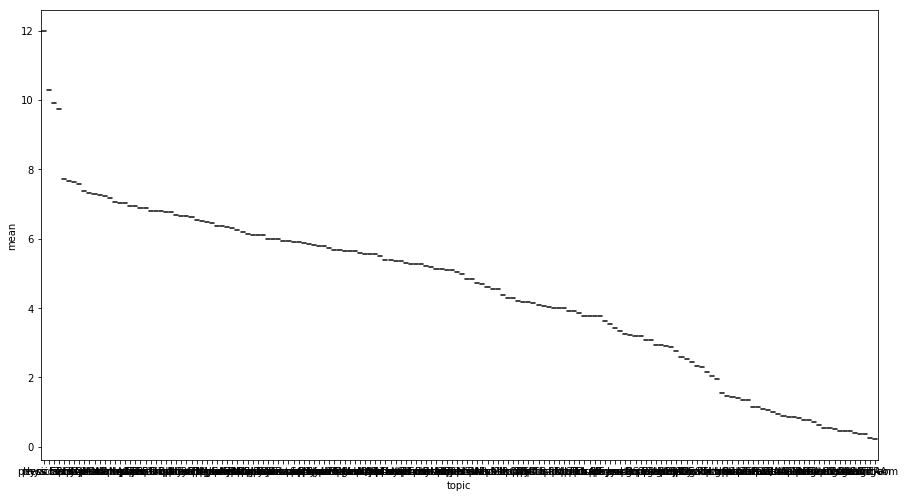

In [40]:
from matplotlib import pyplot
import seaborn as sns
sorted_bytopic = bytopic.sort_values(by='mean', ascending=False)

a4_dims = (15, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x=sorted_bytopic['topic'], y=sorted_bytopic['mean'], ax=ax)

In [73]:
# Try taking the top, just to get better visual
group = df.groupby(['topic'])
group = group.agg(['count', 'min', 'max', 'std', 'mean']).head() # Note we are taking top
group['topic'] = group.index.tolist()
print(group)

         numberPages                                   numberLines       \
               count  min    max        std       mean       count  min   
topic                                                                     
acc-phys          34  4.0   71.0  14.680313  16.941176          34  274   
adap-org         236  2.0  244.0  20.015221  16.911017         237  133   
alg-geom        1190  1.0  159.0  17.767847  23.942017        1190   13   
ao-sci            10  5.0   42.0  12.784105  22.100000          10  199   
astro-ph       14139  0.0  299.0  15.420642  15.273994       14139    3   

                                             ...    numberFiles                \
            max          std         mean    ...            min max       std   
topic                                        ...                                
acc-phys  10664  1798.207096  1120.705882    ...              1  26  4.321422   
adap-org  11699  1161.507231  1061.843882    ...              1  10  0.8418

Yeah, so the above is not readable and super ugly! I actually don't like using python for plotting - it's dismal and hard. I struggled this morning and have given up for now, because I need a break (and a goal probably). Here are a few observations:
    
     - the topics from the lookup file might be some (period separated) list of parent and then child topics - if this is the case we would want to do additional parsing and combine
     - How to plot? I really dislike plotting in Python, it's annoying a hard, which is why I didn't do it here. I'd much rather extract some subset in json and work in javascript or similar, or even R
     - What about missing data?
        
I have to run, but let's chat about what kind of checks we want to ensure having all the data, and then how we want to visualize. I would first try dplyr (in R) and then javascript libraries. Python has never been enjoyable to make graphs with for me (other than plotly which requires an account), but maybe others have better software?